# Load Libraries

In [1]:
#Load Libraries
import os
import matplotlib
import matplotlib.pyplot as plt
import skimage.data
import cv2
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from pandas import DataFrame
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import skimage
import seaborn as sns
import glob
from sklearn.metrics import precision_score,recall_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, f1_score

### Train and Test data Set Definition

In [2]:
Train_dir = "Images_Train"
Test_dir = "Images_Test"
directories =os.listdir(Train_dir)
directories_test = os.listdir(Test_dir)

### Function to read Train and Test Images 

In [3]:
def read_data(Root_dir,directories):
    images=[]
    labels=[]
    print (Root_dir)
    for directory in directories:
        label_dir = os.path.join(Root_dir, directory)
        print (label_dir)
        file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for file_name in file_names:
            images.append(skimage.data.imread(file_name))
            if (directory[-2]=='0'):
                labels.append(int(directory[-1:]))
            else:
                labels.append(int(directory[-2:]))
    return (images, labels)

## Load Train Data 

In [4]:
X_train_list, y_train_list = read_data(Train_dir,directories)

Images_Train
Images_Train\00000
Images_Train\00001
Images_Train\00002
Images_Train\00003
Images_Train\00004
Images_Train\00005
Images_Train\00006
Images_Train\00007
Images_Train\00008
Images_Train\00009
Images_Train\00010
Images_Train\00011
Images_Train\00012
Images_Train\00013
Images_Train\00014
Images_Train\00015
Images_Train\00016
Images_Train\00017
Images_Train\00018
Images_Train\00019
Images_Train\00020
Images_Train\00021
Images_Train\00022
Images_Train\00023
Images_Train\00024
Images_Train\00025
Images_Train\00026
Images_Train\00027
Images_Train\00028
Images_Train\00029
Images_Train\00030
Images_Train\00031
Images_Train\00032
Images_Train\00033
Images_Train\00034
Images_Train\00035
Images_Train\00036
Images_Train\00037
Images_Train\00038
Images_Train\00039
Images_Train\00040
Images_Train\00041
Images_Train\00042


## Load Test Data 

In [5]:
#Read the test images
X_test_list, y_test_list = read_data(Test_dir,directories_test)

Images_Test
Images_Test\00000
Images_Test\00001
Images_Test\00002
Images_Test\00003
Images_Test\00004
Images_Test\00005
Images_Test\00006
Images_Test\00007
Images_Test\00008
Images_Test\00009
Images_Test\00010
Images_Test\00011
Images_Test\00012
Images_Test\00013
Images_Test\00014
Images_Test\00015
Images_Test\00016
Images_Test\00017
Images_Test\00018
Images_Test\00019
Images_Test\00020
Images_Test\00021
Images_Test\00022
Images_Test\00023
Images_Test\00024
Images_Test\00025
Images_Test\00026
Images_Test\00027
Images_Test\00028
Images_Test\00029
Images_Test\00030
Images_Test\00031
Images_Test\00032
Images_Test\00033
Images_Test\00034
Images_Test\00035
Images_Test\00036
Images_Test\00037
Images_Test\00038
Images_Test\00039
Images_Test\00040
Images_Test\00041
Images_Test\00042


### Function to Resize  Images 

In [6]:
#Resize the Image
def resize_image(images):
    image_resize = [cv2.resize(image,(32,32)) for image in images]
    return (image_resize)

In [7]:
X_train_resize = resize_image(X_train_list)
X_test_resize = resize_image(X_test_list)

In [8]:
#Convert list to numpy array
X_train_data = np.array(X_train_resize)
y_train_labels = np.array(y_train_list)
test_dataset = np.array(X_test_resize)
test_labels = np.array(y_test_list)

In [9]:
#Split into train and Valid sets
train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(X_train_data, y_train_labels, test_size=0.20, stratify=y_train_labels)

In [10]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32, 3) (31367,)
Validation set (7842, 32, 32, 3) (7842,)
Test set (12569, 32, 32, 3) (12569,)


### Function to Convert RGB to Gray Scale Images 

In [11]:
#Convert to Gray Scale and normalize
def rgbTogray(images):
    images_gray = np.mean(images, axis=3)
    return images_gray

### Function to Normalize Data of the Images 

In [12]:
#Normalize the data
def normalizeData(images):
    #SUbtract the mean value
    images -= np.mean(images)
    
    #Divide by the standard deviation
    images /= np.std(images)
    
    return images

train_dataset = normalizeData(rgbTogray(train_dataset))
valid_dataset = normalizeData(rgbTogray(valid_dataset))
test_dataset = normalizeData(rgbTogray(test_dataset))

In [13]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32) (31367,)
Validation set (7842, 32, 32) (7842,)
Test set (12569, 32, 32) (12569,)


## Data Exploration 

#### Display images and Class labels

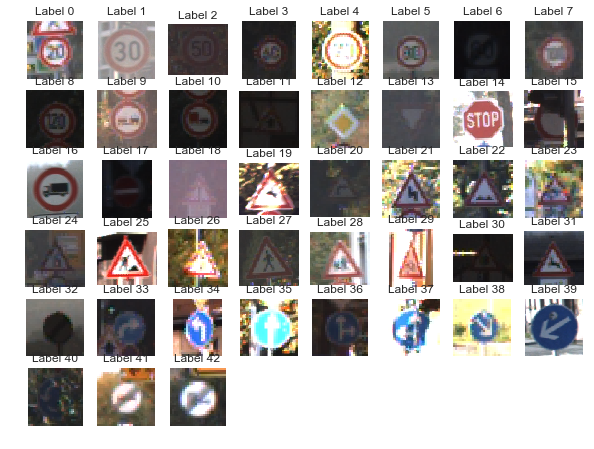

In [14]:
def display_traffic_images(images, labels):
    #Display one image from each set
    unique_labels = set(labels)
    plt.figure(figsize =(10,10))
    im_idx = 1
    for label in unique_labels:
        #Pick the image for each label.
        image = images[labels.index(label)]
        plt.subplot(8,8, im_idx)
        plt.axis("off")
        plt.title("Label {0}".format(label))
        im_idx= im_idx+1
        _=plt.imshow(image)
    plt.show()
    
display_traffic_images(X_train_list,y_train_list)

#### Histogram of the Images

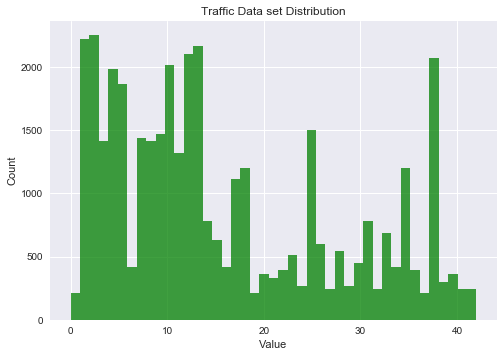

In [15]:
plt.hist(y_train_labels, bins=43,facecolor='green',linewidth=2, alpha=0.75)
plt.title ("Traffic Data set Distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

### Basic Input Parameters 

In [16]:
image_size = 32
num_labels = len(np.unique(y_train_labels))
num_channels = 1 

In [17]:
#Refomat the convolutions
def reformat(features, labels):
    features = features.reshape((-1,image_size,image_size,num_channels)).astype(np.float32)
    labels = (np.arange(num_labels)==labels[:,None]).astype(np.float32)
    return features, labels

In [18]:
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (31367, 32, 32, 1) (31367, 43)
Validation set (7842, 32, 32, 1) (7842, 43)
Test set (12569, 32, 32, 1) (12569, 43)


### Helper Functions for Calculating Accuracy, Loss

In [19]:
#Define Accuracy Function
def cal_accuracy(predictions, labels):
    accuracy = (100*np.sum(np.argmax(predictions,1)== np.argmax(labels,1))/predictions.shape[0])
    return accuracy

In [20]:
#Define Loss Function
def cal_loss(predictions,labels):
    loss = np.mean(np.square(predictions-labels))
    return loss

In [21]:
def plot_confusion_matrix(cm,title):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    title = title+' '+'Confusion Matrix'
    plt.title(title)
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

## Model 1 

In this simple model for classification I build the model with two convolution layers and 1 fully connected layer. I used 64 hidden units for the fully connected layer. 
I used a constant output filters or depth of 16 for both the convolution layers.
I did not use any regularization for optimizing the cost function.
A batch size of 128 was used for training the model.

In [22]:
batch_size =128
patch_size =5
depth =16
num_hidden =64

In [23]:
graph= tf.Graph()
with graph.as_default():
    
    #Define the placeholder
    x= tf.placeholder(tf.float32, shape=(None, image_size, image_size, num_channels), name='x')
    y= tf.placeholder(tf.float32, shape=(None,num_labels))
    
    train_x = tf.constant(train_dataset)
    valid_x = tf.constant(valid_dataset)
    test_x = tf.constant(test_dataset)
    
    #Define the weight variables
    l1_weight = tf.Variable(tf.truncated_normal([patch_size,patch_size,num_channels,depth],mean=0, stddev=0.1))
    
    l1_bias = tf.Variable(tf.zeros([depth]))
    
    #Layer 2
    l2_weight = tf.Variable(tf.truncated_normal([patch_size,patch_size,depth,depth],mean=0, stddev=0.1))
    
    l2_bias = tf.Variable(tf.constant(1.0, shape=[depth]))
    
    #Layer 3
    l3_weight = tf.Variable(tf.truncated_normal([image_size//4*image_size//4 * depth,num_hidden],mean=0, stddev=0.1))
    
    l3_bias = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
    #Layer 4
    l4_weight = tf.Variable(tf.truncated_normal([num_hidden,num_labels],mean=0, stddev=0.1))
    l4_bias = tf.Variable(tf.constant(1.0,shape=[num_labels]))
    
    #Define Model
    def model(data):
        conv1 = tf.nn.conv2d(data,l1_weight,[1,2,2,1], padding="SAME")
        
        hidden1 = tf.nn.relu(conv1+l1_bias)
       
        conv2 = tf.nn.conv2d(hidden1, l2_weight,[1,2,2,1], padding="SAME")
        hidden2 = tf.nn.relu(conv2+l2_bias)
       
        shape = hidden2.get_shape().as_list()
        
   
        reshape = tf.reshape(hidden2,[-1, shape[1]*shape[2]*shape[3]])
        
       
        hidden3 = tf.nn.relu(tf.matmul(reshape,l3_weight)+l3_bias)
       
        out_layer = tf.matmul(hidden3,l4_weight) + l4_bias
        
        return out_layer
    
    
    #Training Computation
    logits = model(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = y)
    #loss = tf.reduce_mean(cross_entropy) +0.0001 *(tf.nn.l2_loss(layer1_weight)+tf.nn.l2_loss(layer2_weight)+tf.nn.l2_loss(layer3_weight)+tf.nn.l2_loss(layer4_weight))
    loss = tf.reduce_mean(cross_entropy)
    #Optimizer
    optimizer = tf.train.AdamOptimizer(1e-3).minimize(loss)
    
    #Prediction
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(valid_x))
    test_prediction = tf.nn.softmax(model(test_x))

Training Stared Simple Model
---------------------------
Minibatch loss at step 0: 5.414495
Minibatch accuracy: 1.6%
Validation accuracy: 4.0%
Minibatch loss at step 50: 3.280689
Minibatch accuracy: 13.3%
Validation accuracy: 16.7%
Minibatch loss at step 100: 2.718860
Minibatch accuracy: 32.8%
Validation accuracy: 30.9%
Minibatch loss at step 150: 1.974739
Minibatch accuracy: 46.9%
Validation accuracy: 48.7%
Minibatch loss at step 200: 1.445792
Minibatch accuracy: 58.6%
Validation accuracy: 62.5%
Minibatch loss at step 250: 1.280983
Minibatch accuracy: 67.2%
Validation accuracy: 71.6%
Minibatch loss at step 300: 0.973283
Minibatch accuracy: 71.9%
Validation accuracy: 75.0%
Minibatch loss at step 350: 0.876493
Minibatch accuracy: 75.0%
Validation accuracy: 81.2%
Minibatch loss at step 400: 0.480796
Minibatch accuracy: 84.4%
Validation accuracy: 83.0%
Minibatch loss at step 450: 0.557012
Minibatch accuracy: 83.6%
Validation accuracy: 84.0%
Minibatch loss at step 500: 0.540809
Minibatch a

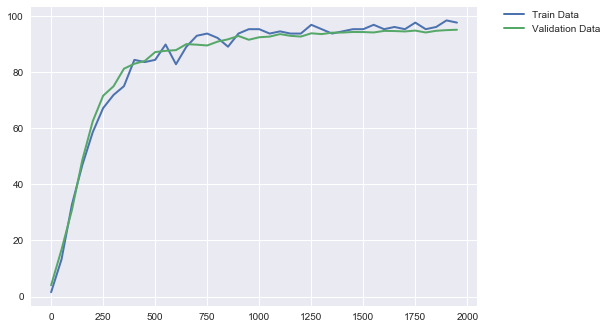

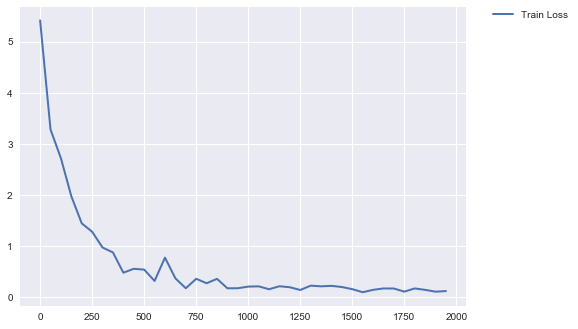

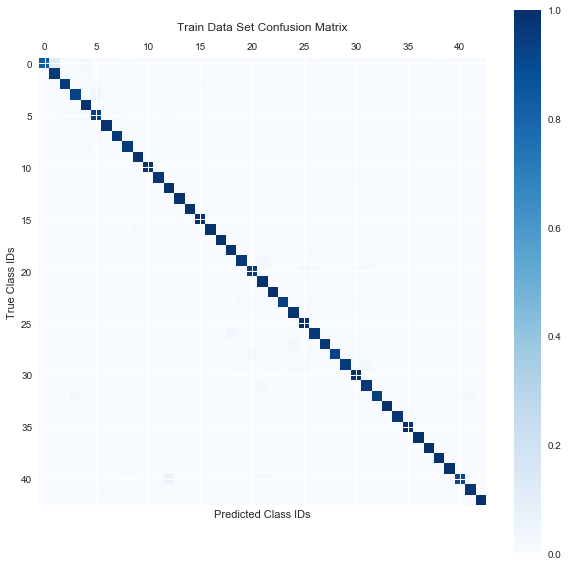

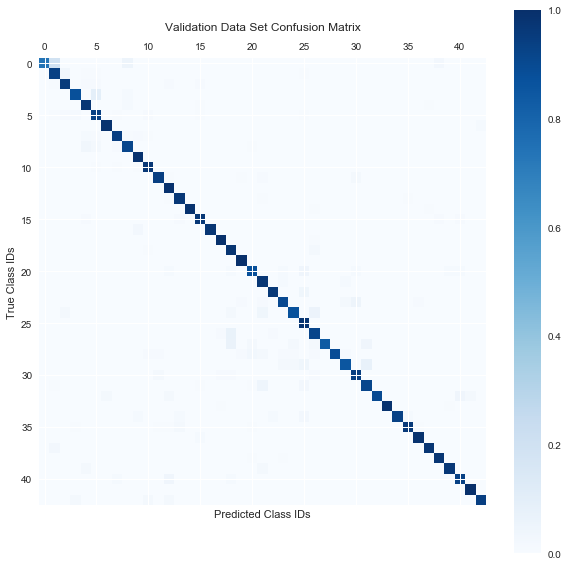

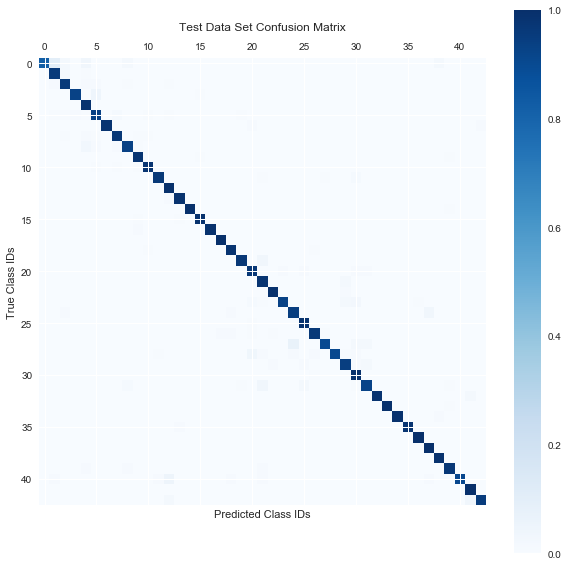

In [24]:
epochs = 2000

with tf.Session(graph=graph) as session:
    #tf.initialize_all_variables().run()
    session.run(tf.global_variables_initializer())
    print('Training Stared Simple Model')
    print ('---------------------------')
    train_acc_history = np.zeros(epochs)
    train_loss_history= np.zeros(epochs)
    valid_acc_history = np.zeros(epochs)
    
    for step in range(epochs):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        feed_dict = {x : batch_data, y : batch_labels}
        model_Network1, train_loss, predictions = session.run([optimizer, loss, train_prediction], 
                                                              feed_dict=feed_dict)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, train_loss))
            print('Minibatch accuracy: %.1f%%' % cal_accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
            train_acc_history[step] = cal_accuracy(predictions, batch_labels)
            valid_acc_history[step] = cal_accuracy(valid_prediction.eval(), valid_labels)
            train_loss_history[step] = train_loss
            
        
        #valid_pred = valid_prediction.eval()
    
    t_pred=(session.run([train_prediction],feed_dict={x:train_dataset,y:train_labels}))
    y_pred_train = np.argmax(t_pred[0],1)
    y_true_train = np.argmax(train_labels,1)
    cm_train = confusion_matrix(y_true_train,y_pred_train)
    
    
    y_pred_valid = (tf.argmax(valid_prediction.eval(), 1)).eval()
    y_true_valid = np.argmax(valid_labels, 1)
    cm_valid = confusion_matrix(y_true_valid, y_pred_valid)
    
    
    #test data set results
    y_pred_test = (tf.argmax(test_prediction.eval(), 1)).eval()
    y_true_test = np.argmax(test_labels, 1)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    
    
    print('Train accuracy: %.1f%%' % cal_accuracy(t_pred[0], train_labels))
    print('valid accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % cal_accuracy(test_prediction.eval(), test_labels))
    
    
    
x_axis = np.arange(epochs)
plt.plot(x_axis[train_acc_history > 0], train_acc_history[train_acc_history > 0], linewidth=2, label= "Train Data")
plt.plot(x_axis[valid_acc_history > 0], valid_acc_history[valid_acc_history > 0],  linewidth=2, label= "Validation Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(x_axis[train_loss_history > 0], train_loss_history[train_loss_history > 0],  linewidth=2, label= "Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Train Set Confusion Matrix
plot_confusion_matrix(cm_train,"Train Data Set")
dm_cm_train= pd.DataFrame(cm_train)
    
#Validation Set Confusion Matrix
dm_cm_valid= pd.DataFrame(cm_valid)
plot_confusion_matrix(cm_valid,"Validation Data Set")
    
#Test Set Confusion Matrix
dm_cm_test= pd.DataFrame(cm_test)
plot_confusion_matrix(cm_test,"Test Data Set")

#Calculate Precision, Recall and F1 Score for the test data
TP_test = np.diagonal(cm_test)
precision = TP_test/np.sum(cm_test, axis=1)
recall = TP_test/np.sum(cm_test, axis=0)
f1_score = 2*precision*recall/(precision+recall)



In [25]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix


#### Precision, Recall and F1 Scores for all classes 

In [26]:
report_model1 = classification_report(y_true_test, y_pred_test)
print (report_model1)

             precision    recall  f1-score   support

          0       1.00      0.82      0.90        60
          1       0.97      0.96      0.96       720
          2       0.96      0.96      0.96       750
          3       0.98      0.93      0.95       450
          4       0.94      0.99      0.97       660
          5       0.93      0.93      0.93       600
          6       0.99      0.98      0.99       120
          7       0.96      0.97      0.96       480
          8       0.97      0.93      0.95       450
          9       0.97      0.98      0.98       480
         10       0.98      0.98      0.98       660
         11       1.00      0.96      0.98       420
         12       0.96      0.99      0.98       690
         13       0.99      0.98      0.99       720
         14       1.00      1.00      1.00       240
         15       0.95      0.99      0.97       210
         16       1.00      0.99      1.00       120
         17       0.99      1.00      0.99   

#### Macro Averaging of Precision, Recall and F1 Scores

In [27]:
from sklearn.metrics import f1_score
f1_score_macro = f1_score(y_true_test, y_pred_test, average="macro")
precision_macro =precision_score(y_true_test, y_pred_test, average="macro")
recall_macro =recall_score(y_true_test, y_pred_test, average="macro")
df_macro = pd.DataFrame({'Precision':[precision_macro],'Recall':[recall_macro],'f1 score':[f1_score_macro]})
df_macro.round(2)

,Precision,Recall,f1 score
0,0.96,0.96,0.96


#### Micro Averaging of Precision, Recall and F1 Scores

In [28]:
f1_score_micro = f1_score(y_true_test, y_pred_test, average="micro")
precision_micro =precision_score(y_true_test, y_pred_test, average="micro")
recall_micro =recall_score(y_true_test, y_pred_test, average="micro")
df_micro = pd.DataFrame({'Precision':[precision_micro],'Recall':[recall_micro],'f1 score':[f1_score_micro]})
df_micro.round(2)

,Precision,Recall,f1 score
0,0.97,0.97,0.97


#### Weighted Averaging of Precision, Recall and F1 Scores 

In [29]:
f1_score_weighted = f1_score(y_true_test, y_pred_test, average="weighted")
precision_weighted =precision_score(y_true_test, y_pred_test, average="weighted")
recall_weighted =recall_score(y_true_test, y_pred_test, average="weighted")
df_weighted = pd.DataFrame({'Precision':[precision_weighted],'Recall':[recall_weighted],'f1 score':[f1_score_weighted]})
df_weighted.round(2)

,Precision,Recall,f1 score
0,0.97,0.97,0.97


## Model 2 Architecture

In this model we build a more detailed CNN. This architecture is very similar to the LENET architecture. In this model I have implemented the drop out and added L2 regularization so to improve accuracy of the model and also prevent over fitting.

In [30]:
batch_size = 128
patch_size = 5
depth = 16
num_hidden = 256
beta_regul = 1e-4
drop_out = 0.5

graph = tf.Graph()

with graph.as_default():

    # Input data.
    x_train_dataset = tf.placeholder(tf.float32, shape=(None, image_size, image_size, num_channels))
    y_train_labels = tf.placeholder(tf.float32, shape=(None, num_labels))
    
    train_x = tf.constant(train_dataset)
    x_valid_dataset = tf.constant(valid_dataset)
    x_test_dataset = tf.constant(test_dataset)
    global_step = tf.Variable(0)
  
    # Variables.
    l1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    l1_biases = tf.Variable(tf.zeros([depth]))
    
    l2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, 2*depth], stddev=0.1))
    l2_biases = tf.Variable(tf.constant(1.0, shape=[2*depth]))
  
    #Size for the next layer
    size3 = ((image_size - patch_size + 1) // 2 - patch_size + 1) // 2
  
    l3_weights = tf.Variable(tf.truncated_normal([2*size3 * size3 * depth, num_hidden], stddev=0.1))
    l3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    #print ("This is layer3", layer3_weights)
    l4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_hidden], stddev=0.1))
    l4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    
    l5_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
    l5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def modelCNN(data, keep_prob):
        # C1 input 28 x 28
        conv1 = tf.nn.conv2d(data, l1_weights, [1, 1, 1, 1], padding='VALID')
        #bias1 = tf.nn.relu(conv1 + l1_biases)
        conv1 = tf.nn.relu(conv1 + l1_biases)
                     
        pool2 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        
        # C3 input 12 x 12
        conv3 = tf.nn.conv2d(pool2, l2_weights, [1, 1, 1, 1], padding='VALID')
        conv3 = tf.nn.relu(conv3 + l2_biases)
        
        # S4 input 8 x 8
        pool4 = tf.nn.max_pool(conv3, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        
        # F5 input 4 x 4
        shape = pool4.get_shape().as_list()
        pool_flat = tf.contrib.layers.flatten(pool4)
        fc5 = tf.nn.relu(tf.matmul(pool_flat, l3_weights) + l3_biases)
    
        drop5 = tf.nn.dropout(fc5, keep_prob)
    
        fc6 = tf.nn.relu(tf.matmul(fc5, l4_weights) + l4_biases)
        
        drop6 = tf.nn.dropout(fc6, keep_prob)
        out_layer = tf.matmul(drop6, l5_weights) + l5_biases
        
        return out_layer
  
    # Training computation.
    logits = modelCNN(x_train_dataset, drop_out)
      
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_train_labels)+
                       0.0001*(tf.nn.l2_loss(l1_weights)+tf.nn.l2_loss(l2_weights)+
                               tf.nn.l2_loss(l3_weights)+tf.nn.l2_loss(l4_weights)+ 
                               tf.nn.l2_loss(l5_weights)))
    
    # Optimizer.
    learning_rate = tf.train.exponential_decay(0.05, global_step, 1000, 0.90, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(modelCNN(x_valid_dataset, 1.0))
    test_prediction = tf.nn.softmax(modelCNN(x_test_dataset, 1.0))

Training Started
---------------------------
Minibatch loss at step 0: 14.985559
Minibatch accuracy: 3.1%
Validation accuracy: 5.8%
Minibatch loss at step 50: 3.421709
Minibatch accuracy: 13.3%
Validation accuracy: 18.5%
Minibatch loss at step 100: 2.822616
Minibatch accuracy: 25.8%
Validation accuracy: 35.3%
Minibatch loss at step 150: 2.168375
Minibatch accuracy: 47.7%
Validation accuracy: 53.8%
Minibatch loss at step 200: 1.761059
Minibatch accuracy: 55.5%
Validation accuracy: 66.8%
Minibatch loss at step 250: 1.977134
Minibatch accuracy: 49.2%
Validation accuracy: 68.7%
Minibatch loss at step 300: 1.423243
Minibatch accuracy: 66.4%
Validation accuracy: 77.6%
Minibatch loss at step 350: 1.243640
Minibatch accuracy: 68.8%
Validation accuracy: 82.7%
Minibatch loss at step 400: 0.804344
Minibatch accuracy: 78.9%
Validation accuracy: 86.7%
Minibatch loss at step 450: 0.927979
Minibatch accuracy: 73.4%
Validation accuracy: 86.8%
Minibatch loss at step 500: 0.901473
Minibatch accuracy: 75

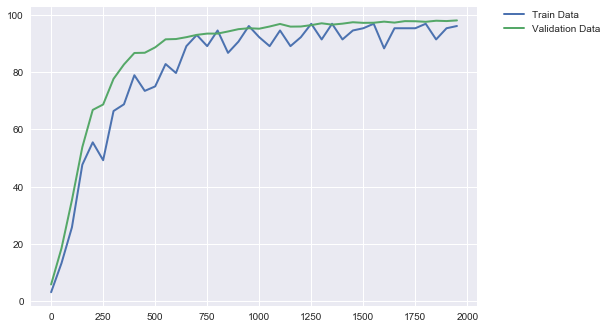

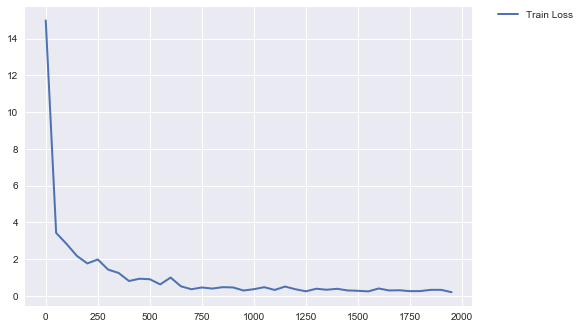

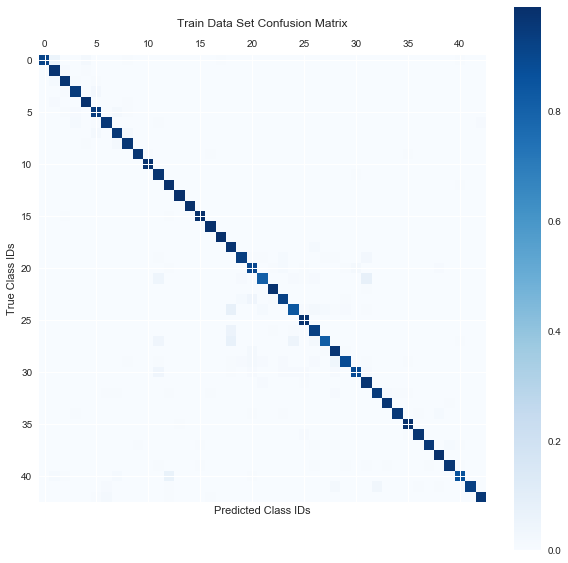

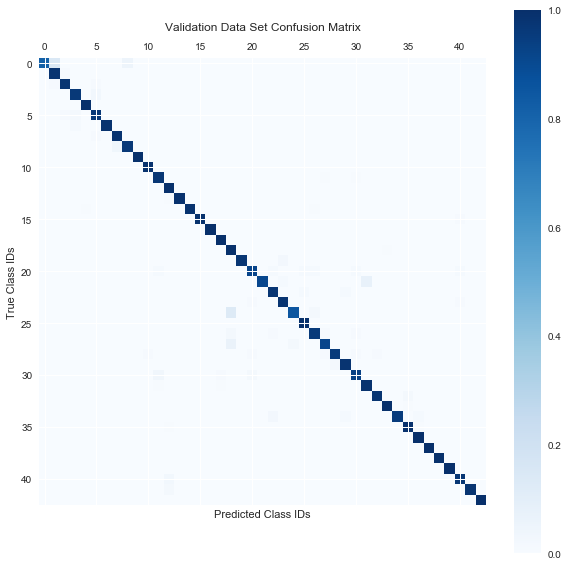

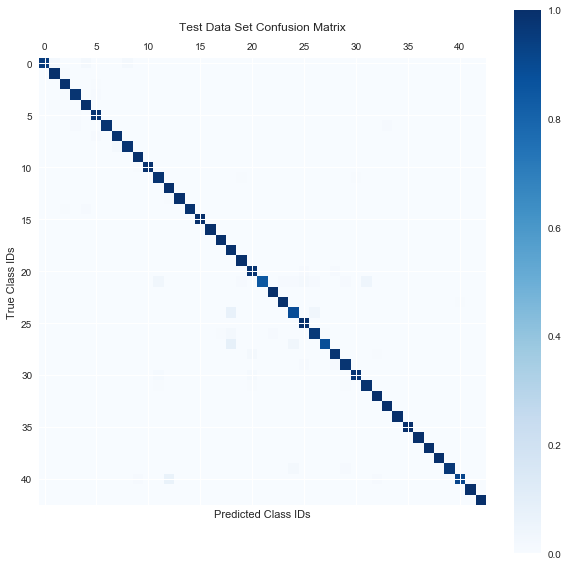

In [31]:
epochs = 2000

with tf.Session(graph=graph) as session:
    saver = tf.train.Saver()
    session.run(tf.global_variables_initializer())
    print('Training Started')
    print ('---------------------------')
    train_acc_history = np.zeros(epochs)
    train_loss_history= np.zeros(epochs)
    valid_acc_history = np.zeros(epochs)
    for step in range(epochs):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        feed_dict = {x_train_dataset : batch_data, y_train_labels : batch_labels}
        model3, train_loss, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, train_loss))
            print('Minibatch accuracy: %.1f%%' % cal_accuracy(predictions, batch_labels))
            print('Validation accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
            train_acc_history[step] = cal_accuracy(predictions, batch_labels)
            valid_acc_history[step] = cal_accuracy(valid_prediction.eval(), valid_labels)
            train_loss_history[step] = train_loss
            
    t_pred=(session.run([train_prediction],feed_dict={x_train_dataset:train_dataset,y_train_labels:train_labels}))
    y_pred_train = np.argmax(t_pred[0],1)
    y_true_train = np.argmax(train_labels,1)
    cm_train = confusion_matrix(y_true_train,y_pred_train)
   
    
    #Valid Data Set Results
    y_pred_valid = (tf.argmax(valid_prediction.eval(), 1)).eval()
    y_true_valid = np.argmax(valid_labels, 1)
    cm_valid = confusion_matrix(y_true_valid, y_pred_valid)
    
    
    
    #Test Results
    y_pred_test = (tf.argmax(test_prediction.eval(), 1)).eval()
    y_true_test = np.argmax(test_labels, 1)
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    
    
    print('Train accuracy: %.1f%%' % cal_accuracy(t_pred[0], train_labels))
    print('valid accuracy: %.1f%%' % cal_accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % cal_accuracy(test_prediction.eval(), test_labels))
    saver.save(session, 'Save_Model\model_final.ckpt')
    print("Model saved")
x_axis = np.arange(epochs)
plt.plot(x_axis[train_acc_history > 0], train_acc_history[train_acc_history > 0], linewidth=2, label= "Train Data")
plt.plot(x_axis[valid_acc_history > 0], valid_acc_history[valid_acc_history > 0],  linewidth=2, label= "Validation Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(x_axis[train_loss_history > 0], train_loss_history[train_loss_history > 0],  linewidth=2, label= "Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Train Set Confusion Matrix
plot_confusion_matrix(cm_train,"Train Data Set")
dm_cm_train= pd.DataFrame(cm_train)
    
#Validation Set Confusion Matrix
dm_cm_valid= pd.DataFrame(cm_valid)
plot_confusion_matrix(cm_valid,"Validation Data Set")
    
#Test Set Confusion Matrix
dm_cm_test= pd.DataFrame(cm_test)
plot_confusion_matrix(cm_test,"Test Data Set")

#Calculate Precision, Recall and F1 Score for the test data
TP_test = np.diagonal(cm_test)
precision = TP_test/np.sum(cm_test, axis=1)
recall = TP_test/np.sum(cm_test, axis=0)
f1_score = 2*precision*recall/(precision+recall)


   

#### Precision, Recall and F1 Scores for all classes 

In [32]:
report_model2 = classification_report(y_true_test, y_pred_test)
print (report_model2)

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        60
          1       0.99      0.99      0.99       720
          2       0.99      0.99      0.99       750
          3       0.99      0.98      0.98       450
          4       0.99      0.99      0.99       660
          5       0.98      0.98      0.98       600
          6       1.00      0.98      0.99       120
          7       0.98      0.99      0.98       480
          8       0.99      0.98      0.98       450
          9       0.99      0.99      0.99       480
         10       1.00      0.99      0.99       660
         11       0.98      0.98      0.98       420
         12       0.98      1.00      0.99       690
         13       1.00      1.00      1.00       720
         14       1.00      0.99      0.99       240
         15       0.99      1.00      0.99       210
         16       1.00      1.00      1.00       120
         17       0.99      1.00      1.00   

#### Macro Averaging of Precision, Recall and F1 Scores

In [33]:
from sklearn.metrics import f1_score
f1_score_macro = f1_score(y_true_test, y_pred_test, average="macro")
precision_macro =precision_score(y_true_test, y_pred_test, average="macro")
recall_macro =recall_score(y_true_test, y_pred_test, average="macro")
df_macro = pd.DataFrame({'Precision':[precision_macro],'Recall':[recall_macro],'f1 score':[f1_score_macro]})
df_macro.round(2)

,Precision,Recall,f1 score
0,0.99,0.98,0.98


#### Micro Averaging of Precision, Recall and F1 Scores 

In [34]:
from sklearn.metrics import f1_score
f1_score_micro = f1_score(y_true_test, y_pred_test, average="micro")
precision_micro =precision_score(y_true_test, y_pred_test, average="micro")
recall_micro =recall_score(y_true_test, y_pred_test, average="micro")
df_micro = pd.DataFrame({'Precision':[precision_micro],'Recall':[recall_micro],'f1 score':[f1_score_micro]})
df_micro.round(2)

,Precision,Recall,f1 score
0,0.99,0.99,0.99


#### Weighted Averaging of Precision, Recall and F1 Scores

In [35]:
f1_score_weighted = f1_score(y_true_test, y_pred_test, average="weighted")
precision_weighted =precision_score(y_true_test, y_pred_test, average="weighted")
recall_weighted =recall_score(y_true_test, y_pred_test, average="weighted")
df_weighted = pd.DataFrame({'Precision':[precision_weighted],'Recall':[recall_weighted],'f1 score':[f1_score_weighted]})
df_weighted.round(2)

,Precision,Recall,f1 score
0,0.99,0.99,0.99


# Test Model on New Images

After training the model I used the model to classify new images downloaded from the internet.

import os
new_data_dir = "New_Data"
directories =os.listdir(new_data_dir)
file_names = directories[:6]

images_new=[]

file_path = new_data_dir+ '/*.png'
#for i in traffic_classes:
for file_name in glob.glob(file_path):
     
    images_new.append(skimage.data.imread(file_name))



In [36]:
new_data= [file for file in glob.glob("New_Data/*.png")]

In [37]:
images_test=[]
for file in new_data:
    image = plt.imread(file)
    image = image.astype(np.float32)
    images_test.append(image)

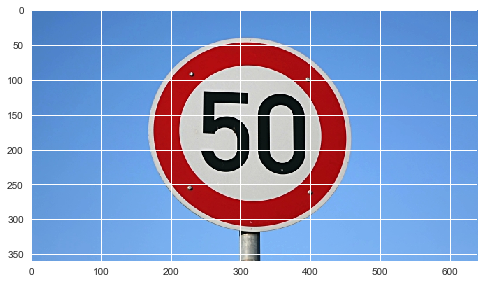

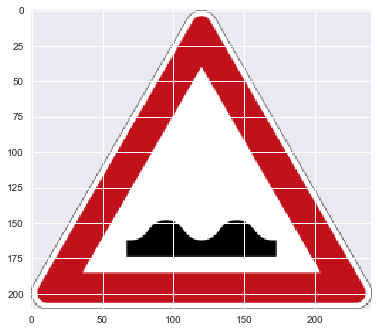

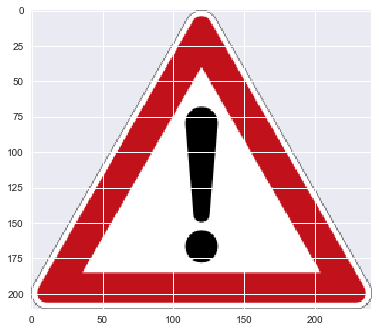

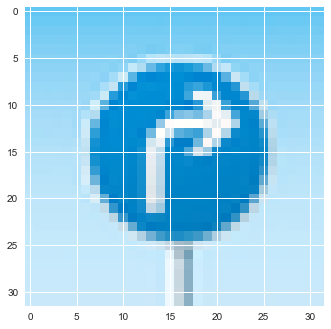

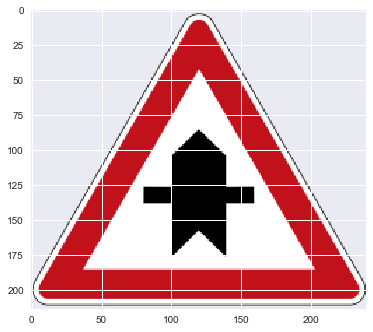

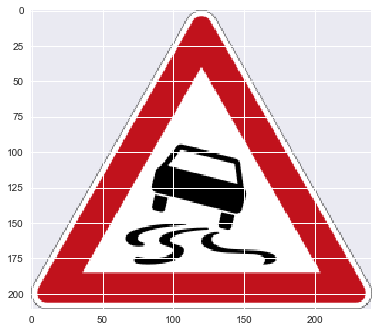

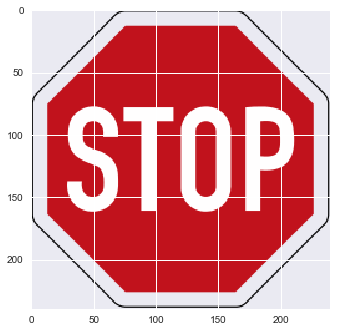

In [38]:
for image in images_test:
    plt.imshow(image)
    plt.show()

In [39]:
#Resize and normalize
image_resize=[]
for image in images_test:
    image = cv2.resize(image,(32,32))
    image = np.mean(image,axis=2)
    image -=np.mean(image)
    image /= np.std(image)
    
    image_resize.append(image)

image_norm = np.array(image_resize)

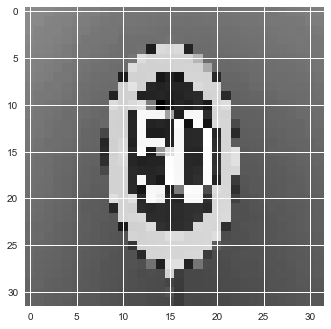

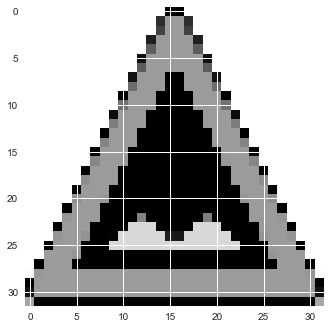

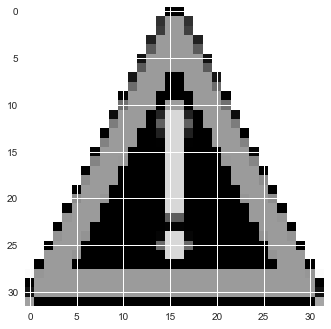

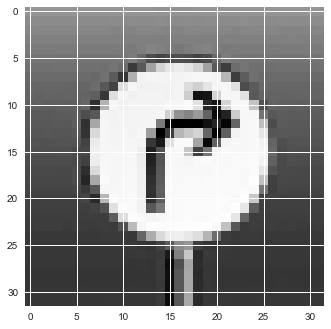

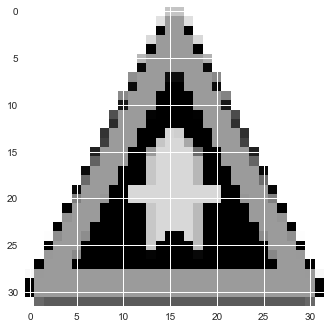

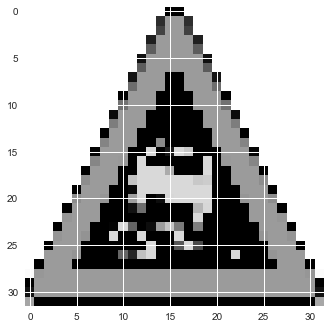

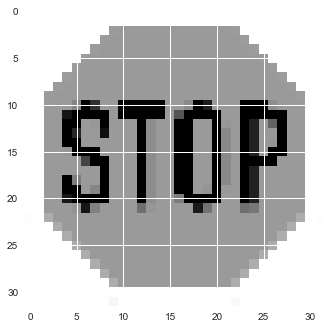

In [40]:
for image in image_norm:
    plt.imshow(image)
    plt.show()

In [41]:
#Manually Label the images
y_collected = np.array([2,22, 18, 33,11, 23, 14])

In [42]:
x_new_cnn, y_new = reformat(image_norm, y_collected)

In [43]:

with tf.Session(graph=graph) as session:
    saver.restore(session, 'Save_Model\model_final.ckpt')
    classes = session.run(logits, feed_dict={x_train_dataset:x_new_cnn})
    print (classes.shape)
    output = session.run(tf.nn.top_k(tf.constant(classes), k=5))
    for i in range(len(output[0])):
        print('Image', i, output[0][i], 'and output', output[1][i])
    

(7, 43)
Image 0 [ 29.49888229  21.80272102  19.48609161  17.92178917  16.32008553] and output [2 1 7 3 5]
Image 1 [ 20.69504166  20.18960762  19.14031219  17.33232689  15.21952629] and output [22 26 18 29 25]
Image 2 [ 28.65303802  19.96107101  15.46544266  15.22623634  14.03529072] and output [18 26 27 24 40]
Image 3 [ 38.10641861  18.90814781  18.72649193  16.5335598   11.5761776 ] and output [33 11 16 32 35]
Image 4 [ 23.640131    18.19000244  16.04700279  13.67135715  13.56851292] and output [11 30 28  1 24]
Image 5 [ 30.04604912  20.33771706  18.88495827  17.43384552  15.70975876] and output [23 30 11 21 19]
Image 6 [ 10.43318748  10.14661407   8.40258884   8.34756756   7.91613865] and output [13  2 15 25 38]


In [44]:
y_collected

array([ 2, 22, 18, 33, 11, 23, 14])

In [45]:
y_predicted =output[1][:,0]

In [46]:
y_predicted

array([ 2, 22, 18, 33, 11, 23, 13])

In [47]:
output[1]

array([[ 2,  1,  7,  3,  5],
       [22, 26, 18, 29, 25],
       [18, 26, 27, 24, 40],
       [33, 11, 16, 32, 35],
       [11, 30, 28,  1, 24],
       [23, 30, 11, 21, 19],
       [13,  2, 15, 25, 38]])

In [48]:
new_data_accuracy= accuracy_score(y_collected,y_predicted)

In [50]:
print ("New Test Data Accuracy: %0.2f"%new_data_accuracy)

New Test Data Accuracy 0.86
